# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name:  Terry Konkin

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Before Taking the Screenshot

In [29]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# !pip list

# print('All prereqs installed.')

### Question 1.  
Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [9]:
import requests
from bs4 import BeautifulSoup
import pickle

url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html5lib')

article = soup.find('article')
article_html = str(article)

file_path = r'C:\Projects\web-scraping\how_laser_headlights_work.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(article_html, f)

print(f"Article HTML saved to {file_path}")



Article HTML saved to C:\Projects\web-scraping\how_laser_headlights_work.pkl


### Question 2.  
Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [13]:
import pickle
from bs4 import BeautifulSoup

file_path = r"C:\Projects\web-scraping\how_laser_headlights_work.pkl"

with open(file_path, 'rb') as f:
    article_html = pickle.load(f)

soup = BeautifulSoup(article_html, 'html5lib')

print(soup.get_text())






    
        How Laser Headlights Work
        
            
                130 Comments            
            
                by:
                Lewin Day
            
        

        
            March 22, 2021
            
                
                
            
        

        
    

    
        When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first i

### Question 3.  
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [ ]:
# this is only installed in the notbook when occasionally, installing in the environment does not work in the notebook
# !python -m spacy download en_core_web_sm

In [8]:
import pickle
import spacy
from bs4 import BeautifulSoup
from collections import Counter


file_path = r"C:\Projects\web-scraping\how_laser_headlights_work.pkl"
with open(file_path, 'rb') as f:
    article_html = pickle.load(f)

soup = BeautifulSoup(article_html, 'html5lib')
text = soup.get_text()

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

token_freq = Counter(tokens)
top_tokens = token_freq.most_common(5)

for token, freq in top_tokens:
    print(f"• Token: '{token}' — Frequency: {freq}")






• Token: 'laser' — Frequency: 35
• Token: 'headlights' — Frequency: 19
• Token: 'headlight' — Frequency: 11
• Token: 'technology' — Frequency: 10
• Token: 'led' — Frequency: 10


### Question 4.  
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [15]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter

file_path = r"C:\Projects\web-scraping\how_laser_headlights_work.pkl"
with open(file_path, 'rb') as f:
    article_html = pickle.load(f)

soup = BeautifulSoup(article_html, 'html5lib')
text = soup.get_text()

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]


lemma_freq = Counter(lemmas)
top_lemmas = lemma_freq.most_common(5)

for lemma, freq in top_lemmas:
    print(f"• Lemma: '{lemma}' — Frequency: {freq}")





• Lemma: 'laser' — Frequency: 40
• Lemma: 'headlight' — Frequency: 28
• Lemma: 'beam' — Frequency: 12
• Lemma: 'technology' — Frequency: 10
• Lemma: 'led' — Frequency: 10


### Question 5. Define the following methods:  
* `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
* `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

score_sentence_by_token

In [21]:
def score_sentence_by_token(sentence, interesting_tokens):

    words = sentence.lower().split()
    interesting_tokens = [token.lower() for token in interesting_tokens]

    match_count = sum(1 for word in words if word in interesting_tokens)

    total_words = len(words)
    score = match_count / total_words if total_words > 0 else 0

    return score


interesting_tokens = ["laser", "headlights", "headlight", "technology", "led"]
sentence = "When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind."

score = score_sentence_by_token(sentence, interesting_tokens)
print(f"Score of first sentence is: {score:.3f}")




Score of first sentence is: 0.029


score_sentence_by_lemma

In [23]:
def score_sentence_by_lemma(sentence, interesting_lemmas):

    words = sentence.lower().split()
    interesting_lemmas = [lemma.lower() for lemma in interesting_lemmas]

    match_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)

    total_words = len(words)
    score = match_count / total_words if total_words > 0 else 0

    return score

interesting_lemmas = ["laser", "headlight", "beam", "technology", "led"]
sentence = "When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind."

score = score_sentence_by_lemma(sentence, interesting_lemmas)
print(f"Score of first sentence is: {score:.3f}")



Score of first sentence is: 2.857


### Question 6.  
Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

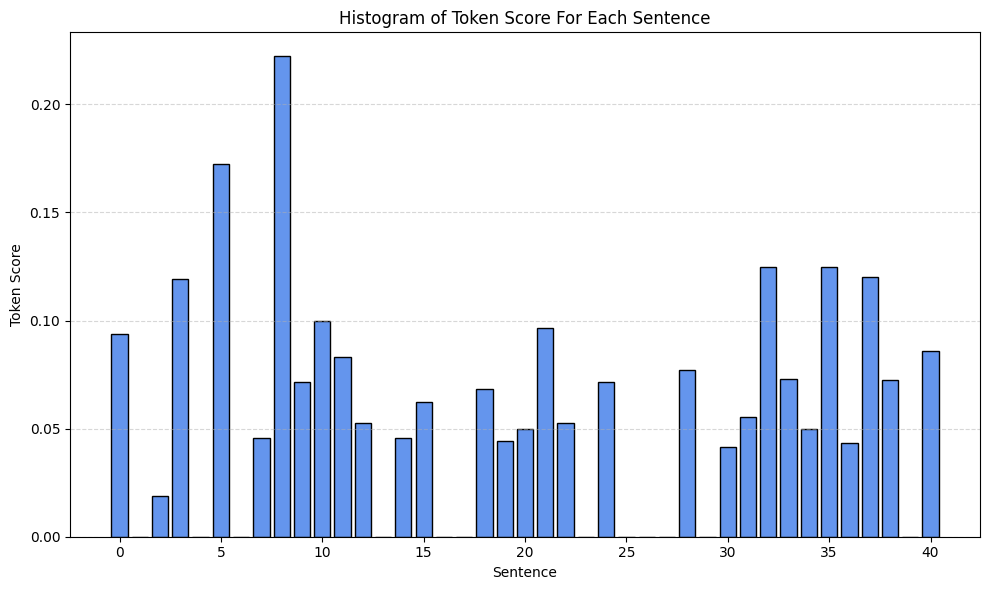

In [31]:
import re

def score_sentence_by_token(sentence, interesting_tokens):
    words = sentence.lower().split()
    interesting_tokens = [token.lower() for token in interesting_tokens]
    match_count = sum(1 for word in words if word in interesting_tokens)
    total_words = len(words)
    score = match_count / total_words if total_words > 0 else 0
    return(score)


file_path = r"C:\Projects\web-scraping\how_laser_headlights_work.pkl"
with open(file_path, 'rb') as f:
    article_html = pickle.load(f)

soup = BeautifulSoup(article_html, 'html5lib')
text = soup.get_text()

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

sentences = re.split(r'(?<=[.!?]) +', text.strip())

interesting_tokens = ["laser", "headlights", "headlight", "technology", "led"]

scores = [score_sentence_by_token(sentence, interesting_tokens) for sentence in sentences]

plt.figure(figsize=(10, 6))
plt.bar(range(len(scores)), scores, color='cornflowerblue', edgecolor='black')
plt.title("Histogram of Token Score For Each Sentence")
plt.xlabel("Sentence")
plt.ylabel("Token Score")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()







### Question 7.  
Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

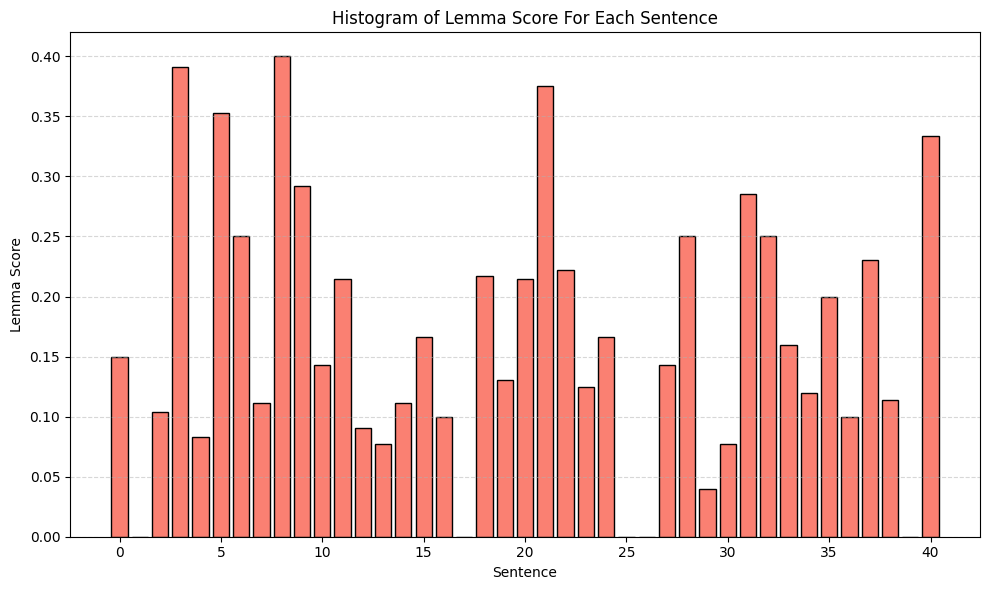

In [33]:
import re
nlp = spacy.load("en_core_web_sm")

def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    interesting_lemmas = [lemma.lower() for lemma in interesting_lemmas]
    lemmas = [
        token.lemma_.lower()
        for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space
    ]
    match_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    total_words = len(lemmas)
    score = match_count / total_words if total_words > 0 else 0
    return score


file_path = r"C:\Projects\web-scraping\how_laser_headlights_work.pkl"
with open(file_path, 'rb') as f:
    article_html = pickle.load(f)


soup = BeautifulSoup(article_html, 'html5lib')
text = soup.get_text()

sentences = re.split(r'(?<=[.!?]) +', text.strip())

interesting_lemmas = ["laser", "headlight", "beam", "technology", "led"]

scores = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in sentences]

plt.figure(figsize=(10, 6))
plt.bar(range(len(scores)), scores, color='salmon', edgecolor='black')
plt.title("Histogram of Lemma Score For Each Sentence")
plt.xlabel("Sentence")
plt.ylabel("Lemma Score")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




### Question 8.  
Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  

For both the tokens and lemmas, "led" would be eliminated".


How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

There is a statement that can be added to the function, to only search for nouns.  
token.pos_ in ["NOUN", "PROPN"]

